# Decison Tree without Hyperparameter and grid search CV 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

# Assuming the dataset is saved as 'titanic.csv' in the current directory
titanic_data = pd.read_csv(r"C:\Users\PREET\Downloads/titanic.csv", encoding = "latin1")

# Display the first few rows to understand the structure of the data
print(titanic_data.head())


# Drop columns that are not useful for prediction (e.g., PassengerId, Name, Ticket, Cabin)
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values (e.g., fill with mean for numerical, mode for categorical)
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])

# Separate features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)


# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
print(classification_report(y_test, y_pred))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ac

# Decison Tree with Hyperparameter and grid search CV

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\PREET\Downloads/heart_v2.csv", encoding = "latin-1")

In [5]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [7]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [8]:
x = df.drop("heart disease", axis = 1)
y = df["heart disease"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.6,random_state = 42)
x_train.shape,x_test.shape

((162, 4), (108, 4))

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
list(x.columns)

['age', 'sex', 'BP', 'cholestrol']

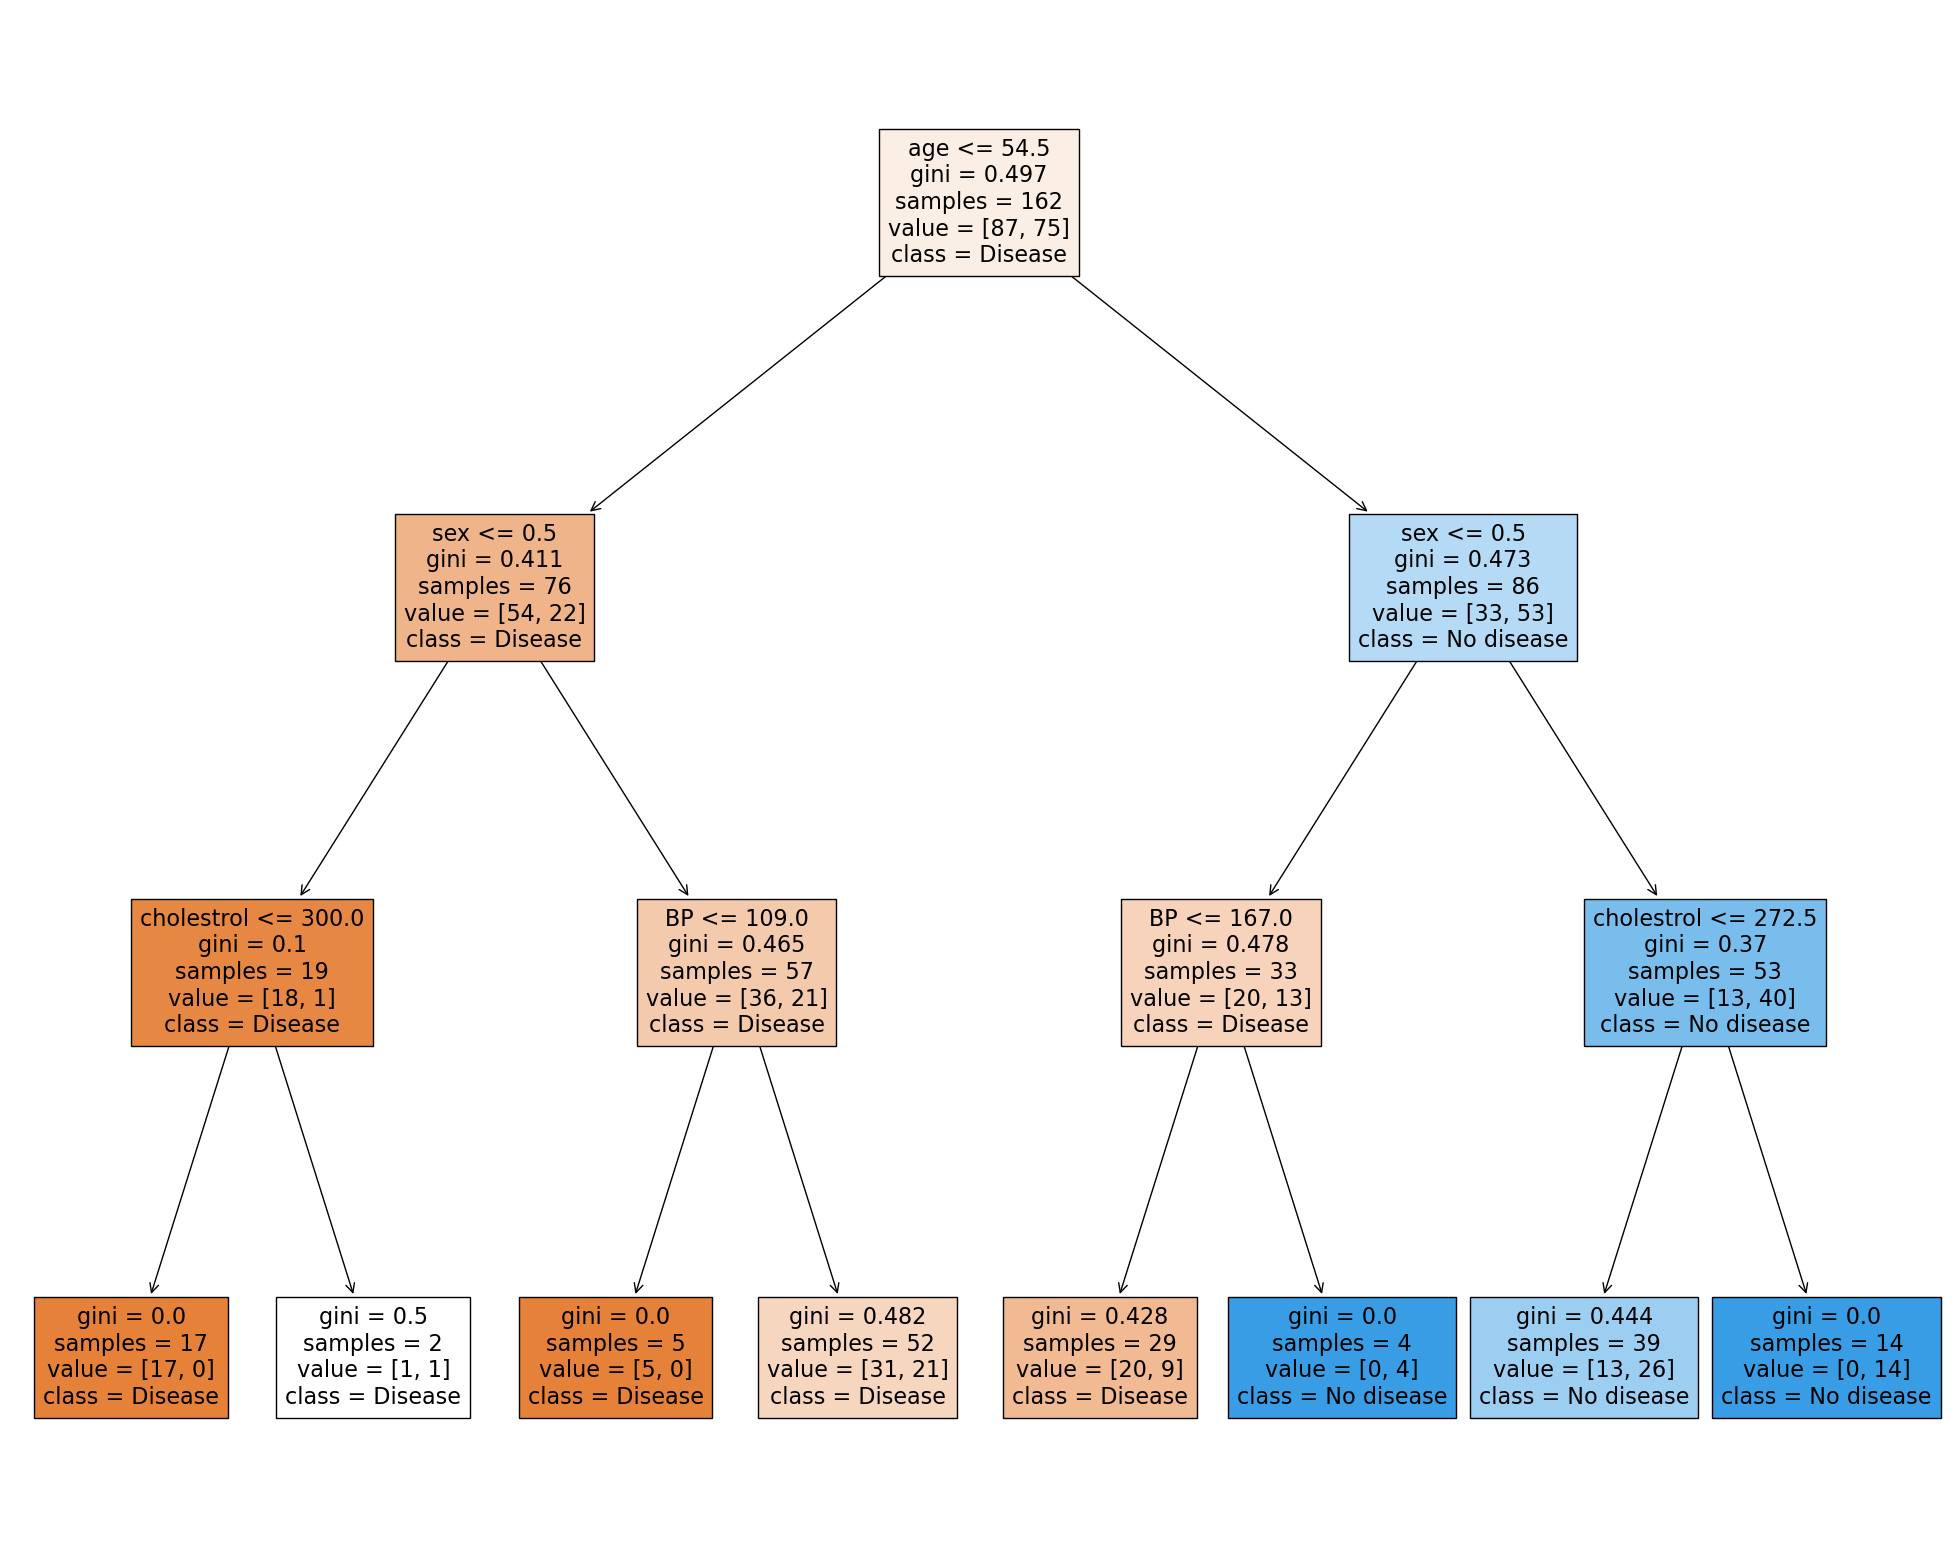

In [14]:
from sklearn import tree
figure = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names = list(x.columns),
                   class_names = ["Disease","No disease"],
                   filled = True)

In [15]:
y_train.pred = dt.predict(x_train)
y_test.pred = dt.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [17]:
print(accuracy_score(y_train,y_train.pred))
confusion_matrix(y_train,y_train.pred)

0.7283950617283951


array([[74, 13],
       [31, 44]], dtype=int64)

In [18]:
print(accuracy_score(y_test,y_test.pred))
confusion_matrix(y_test,y_test.pred)

0.6481481481481481


array([[48, 15],
       [23, 22]], dtype=int64)

In [19]:
def get_df_graph(dt_classifier):
    fig = plt.figure(figsize = (20,25))
    _ = tree.plot_tree(dt_classifier,
                      feature_names = list(x.columns),
                      class_names = ["Disease","No disease"],
                      filled = True)

In [20]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(x_test)))

In [21]:
dt_default = DecisionTreeClassifier(random_state = 42)
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

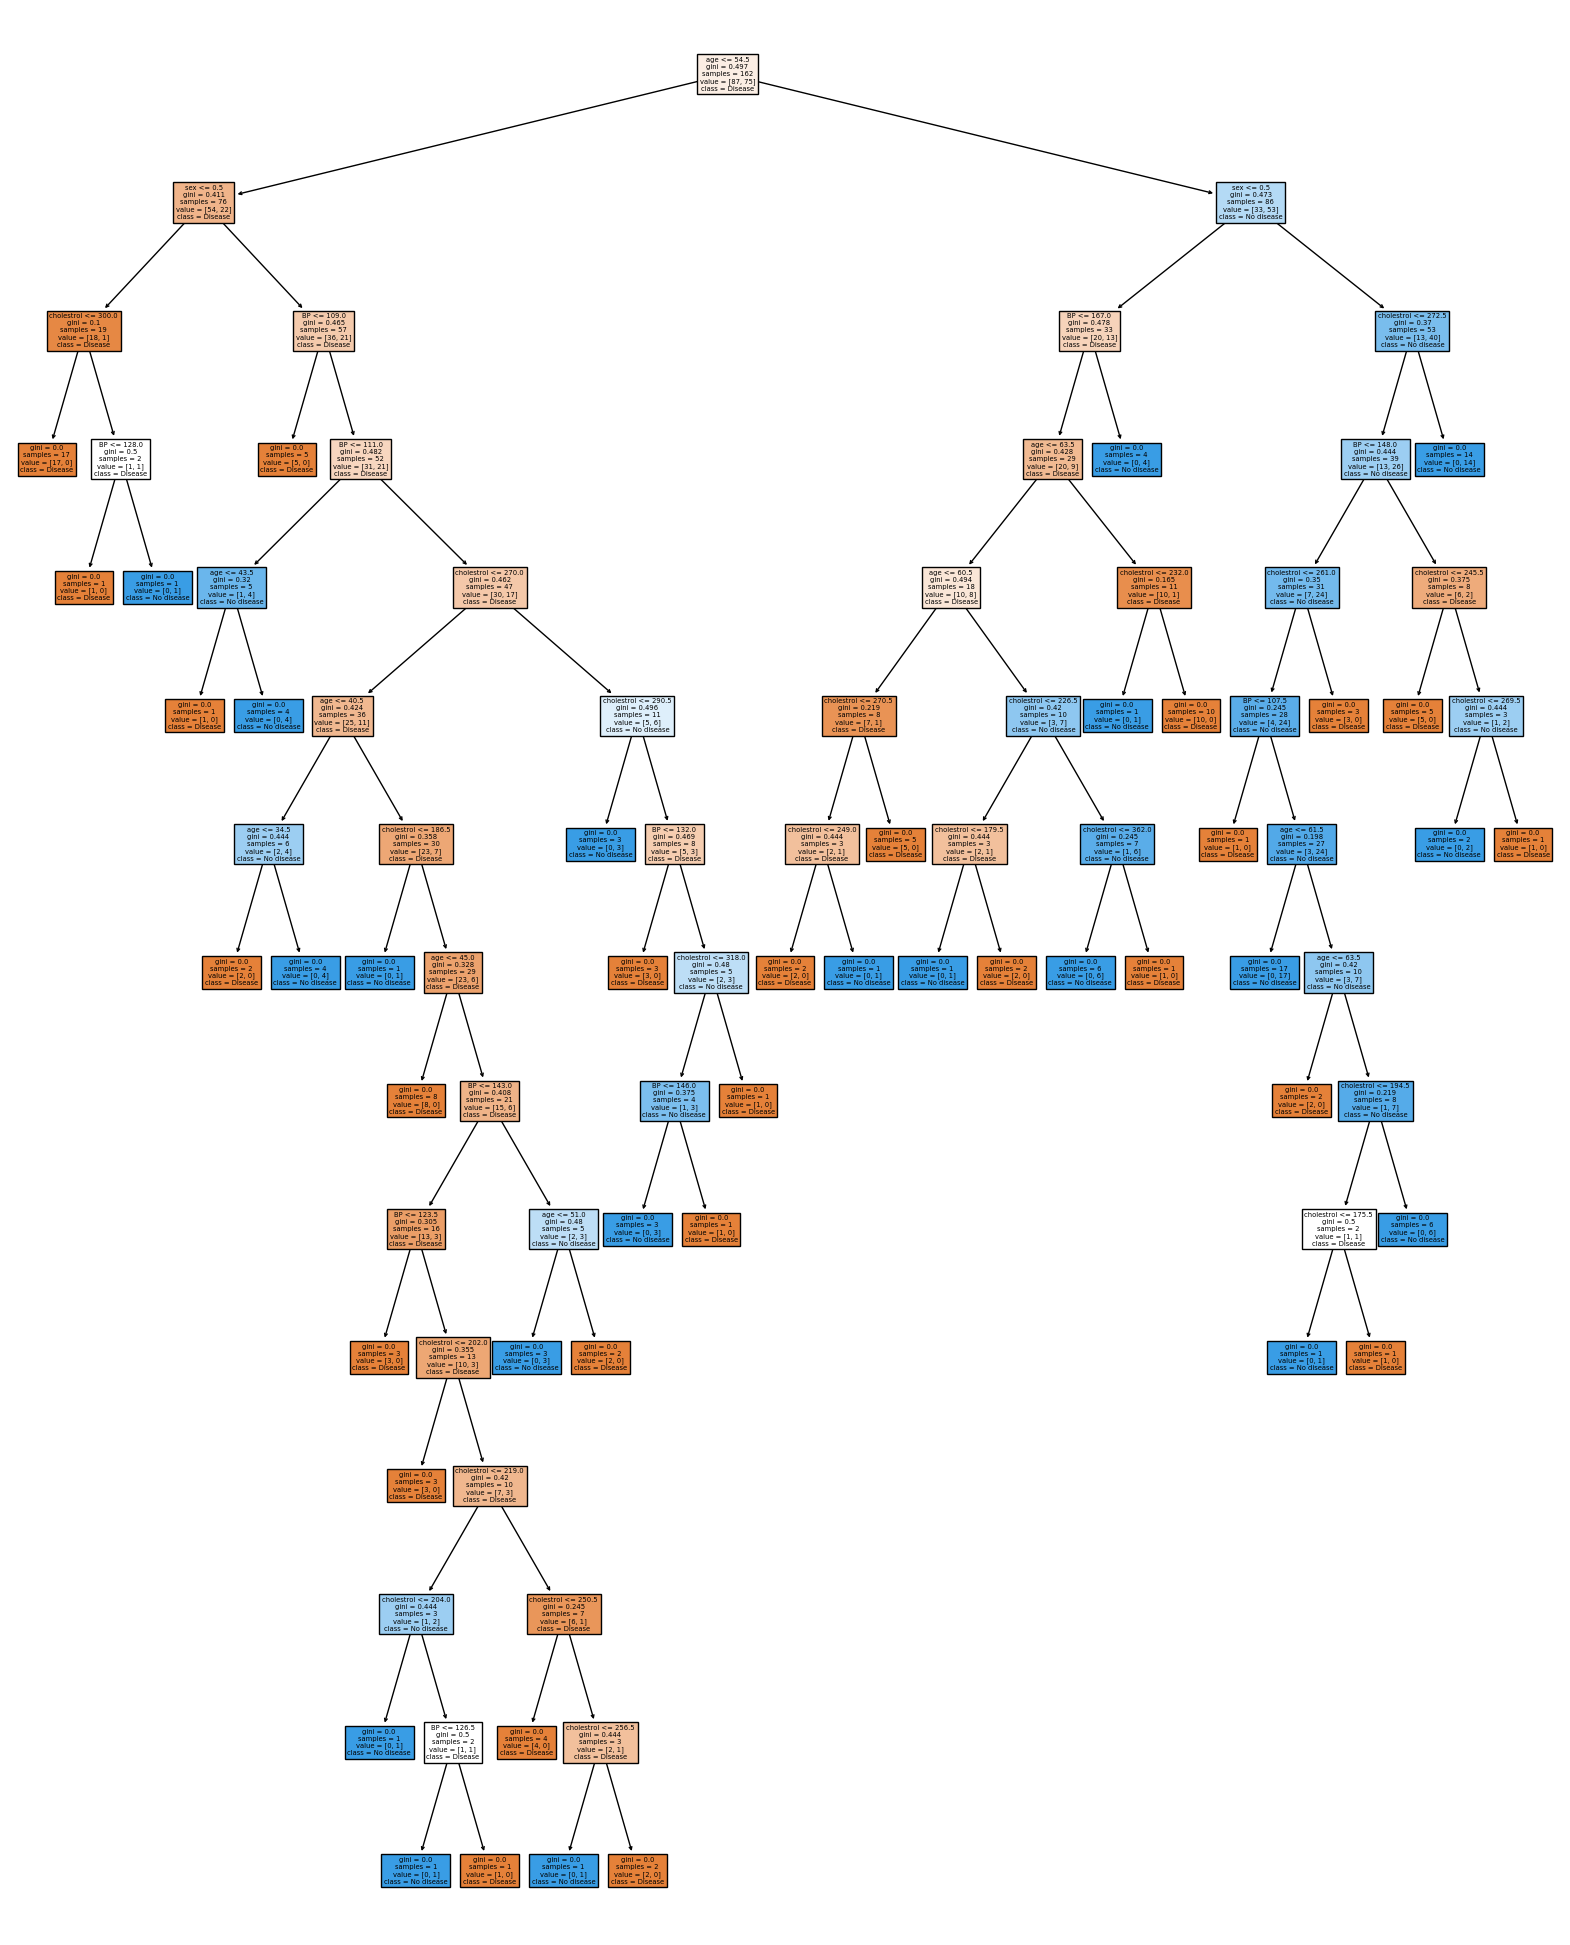

In [22]:
gph = get_df_graph(dt_default)

In [23]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[87  0]
 [ 0 75]]
--------------------------------------------------
Test Accuracy : 0.5740740740740741
Test Confusion Matrix:
[[34 29]
 [17 28]]


In [24]:
dt_depth = DecisionTreeClassifier(max_depth = 3)
dt_depth.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

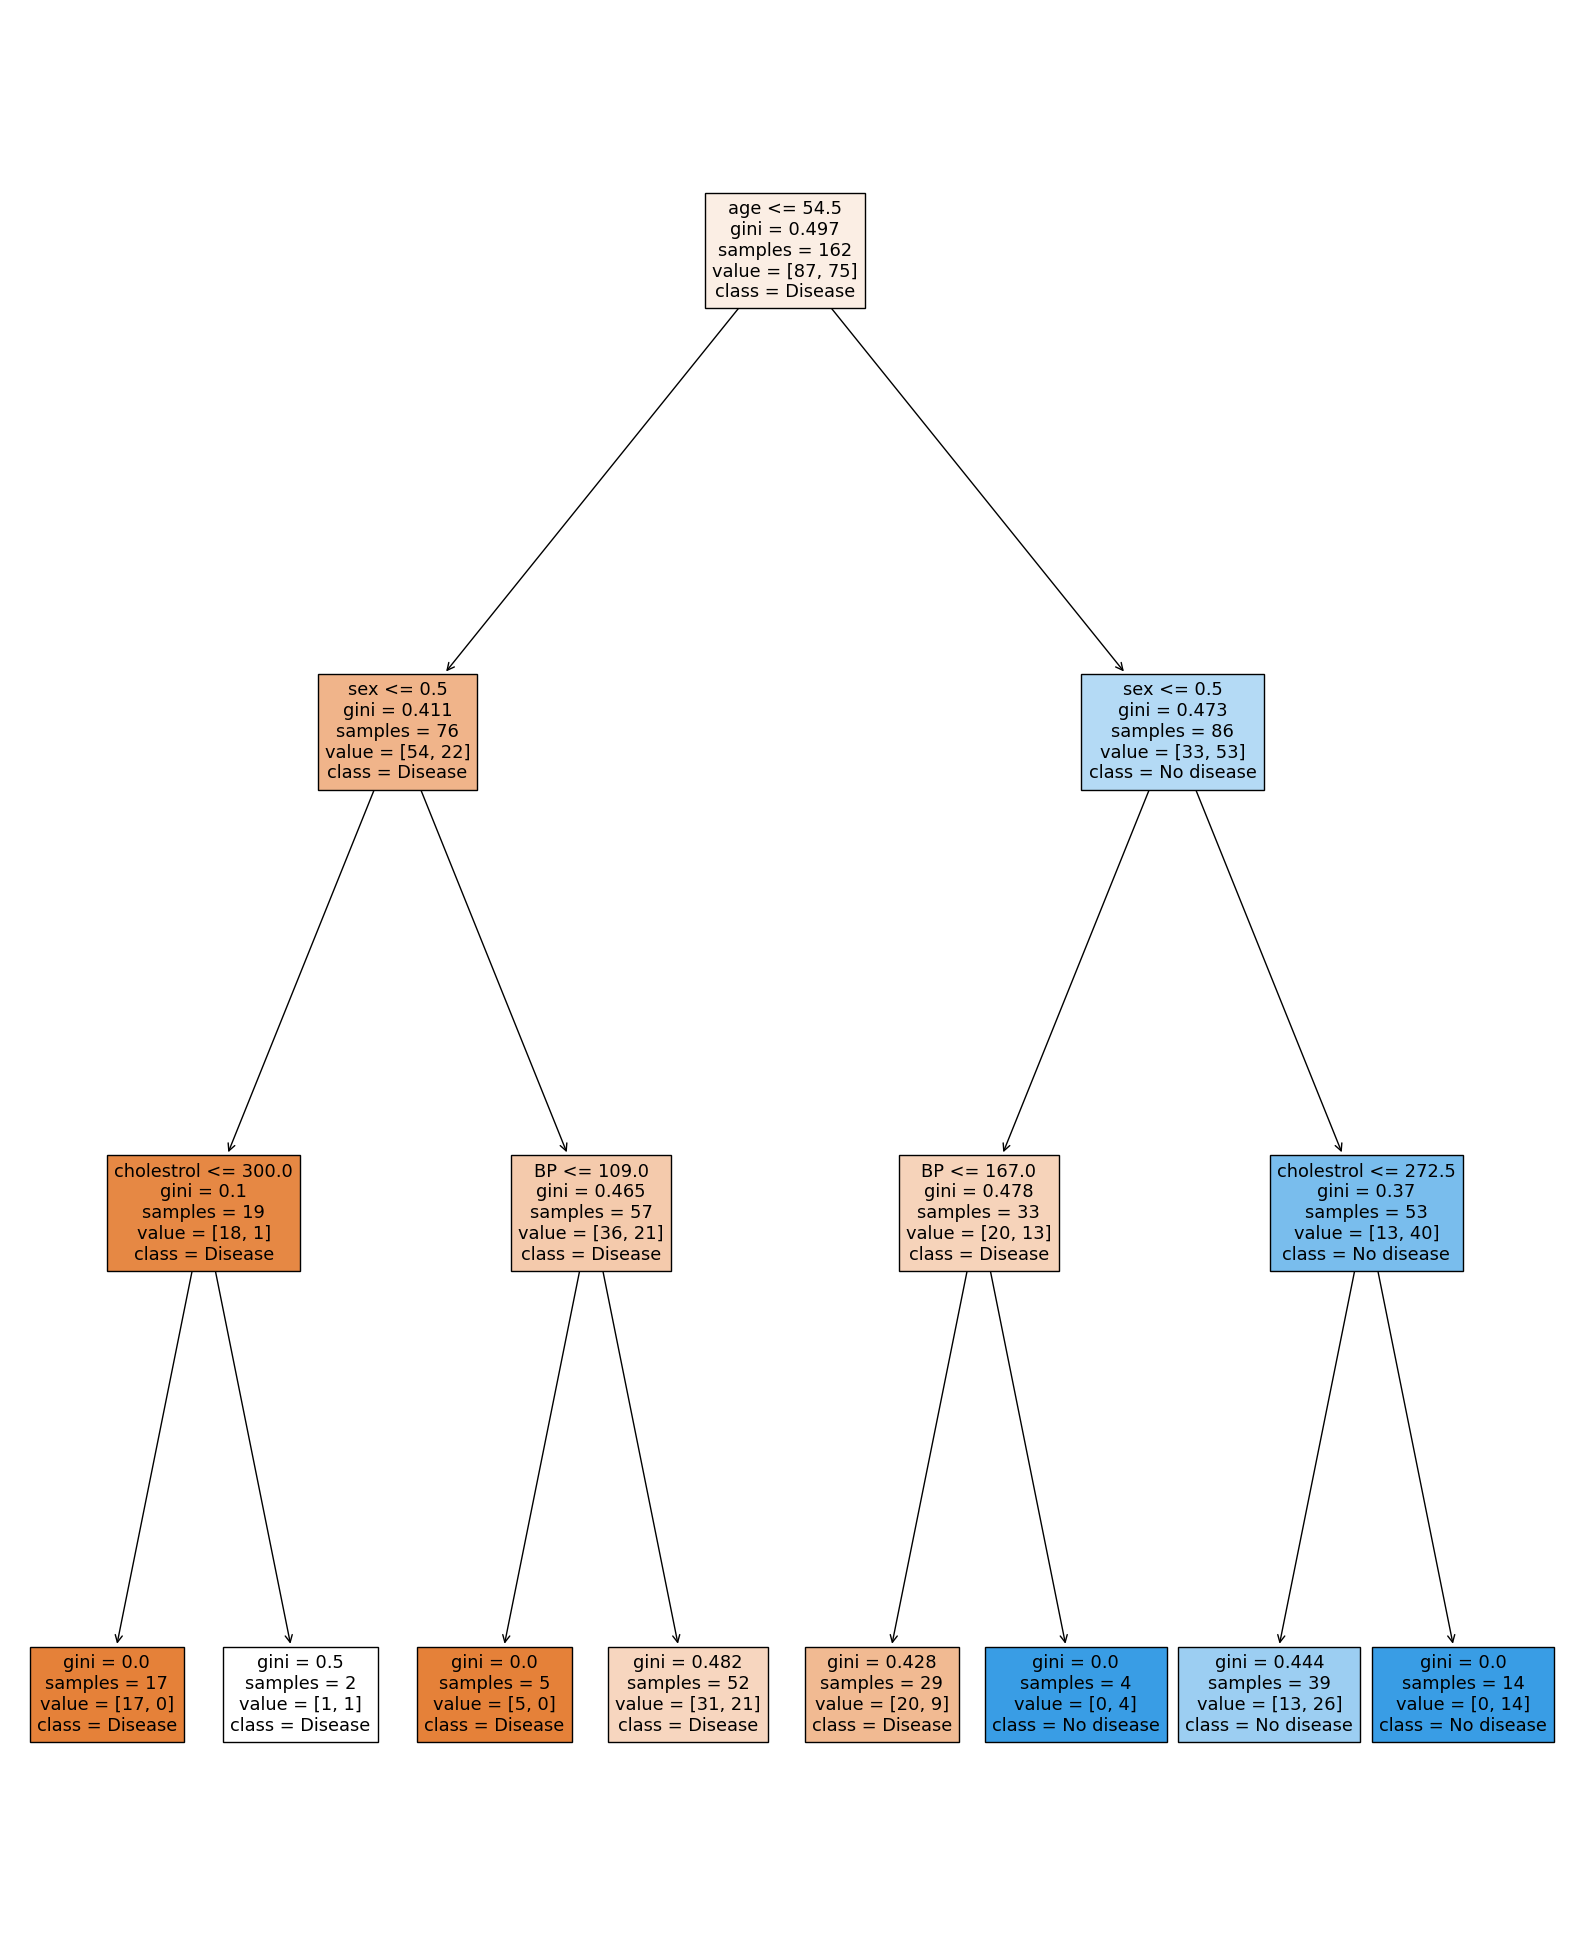

In [26]:
gph = get_df_graph(dt_depth)

In [27]:
evaluate_model(dt_depth)

Train Accuracy : 0.7283950617283951
Train Confusion Matrix:
[[74 13]
 [31 44]]
--------------------------------------------------
Test Accuracy : 0.6481481481481481
Test Confusion Matrix:
[[48 15]
 [23 22]]


In [29]:
dt_min_split = DecisionTreeClassifier(min_samples_split = 20)
dt_min_split.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=20)

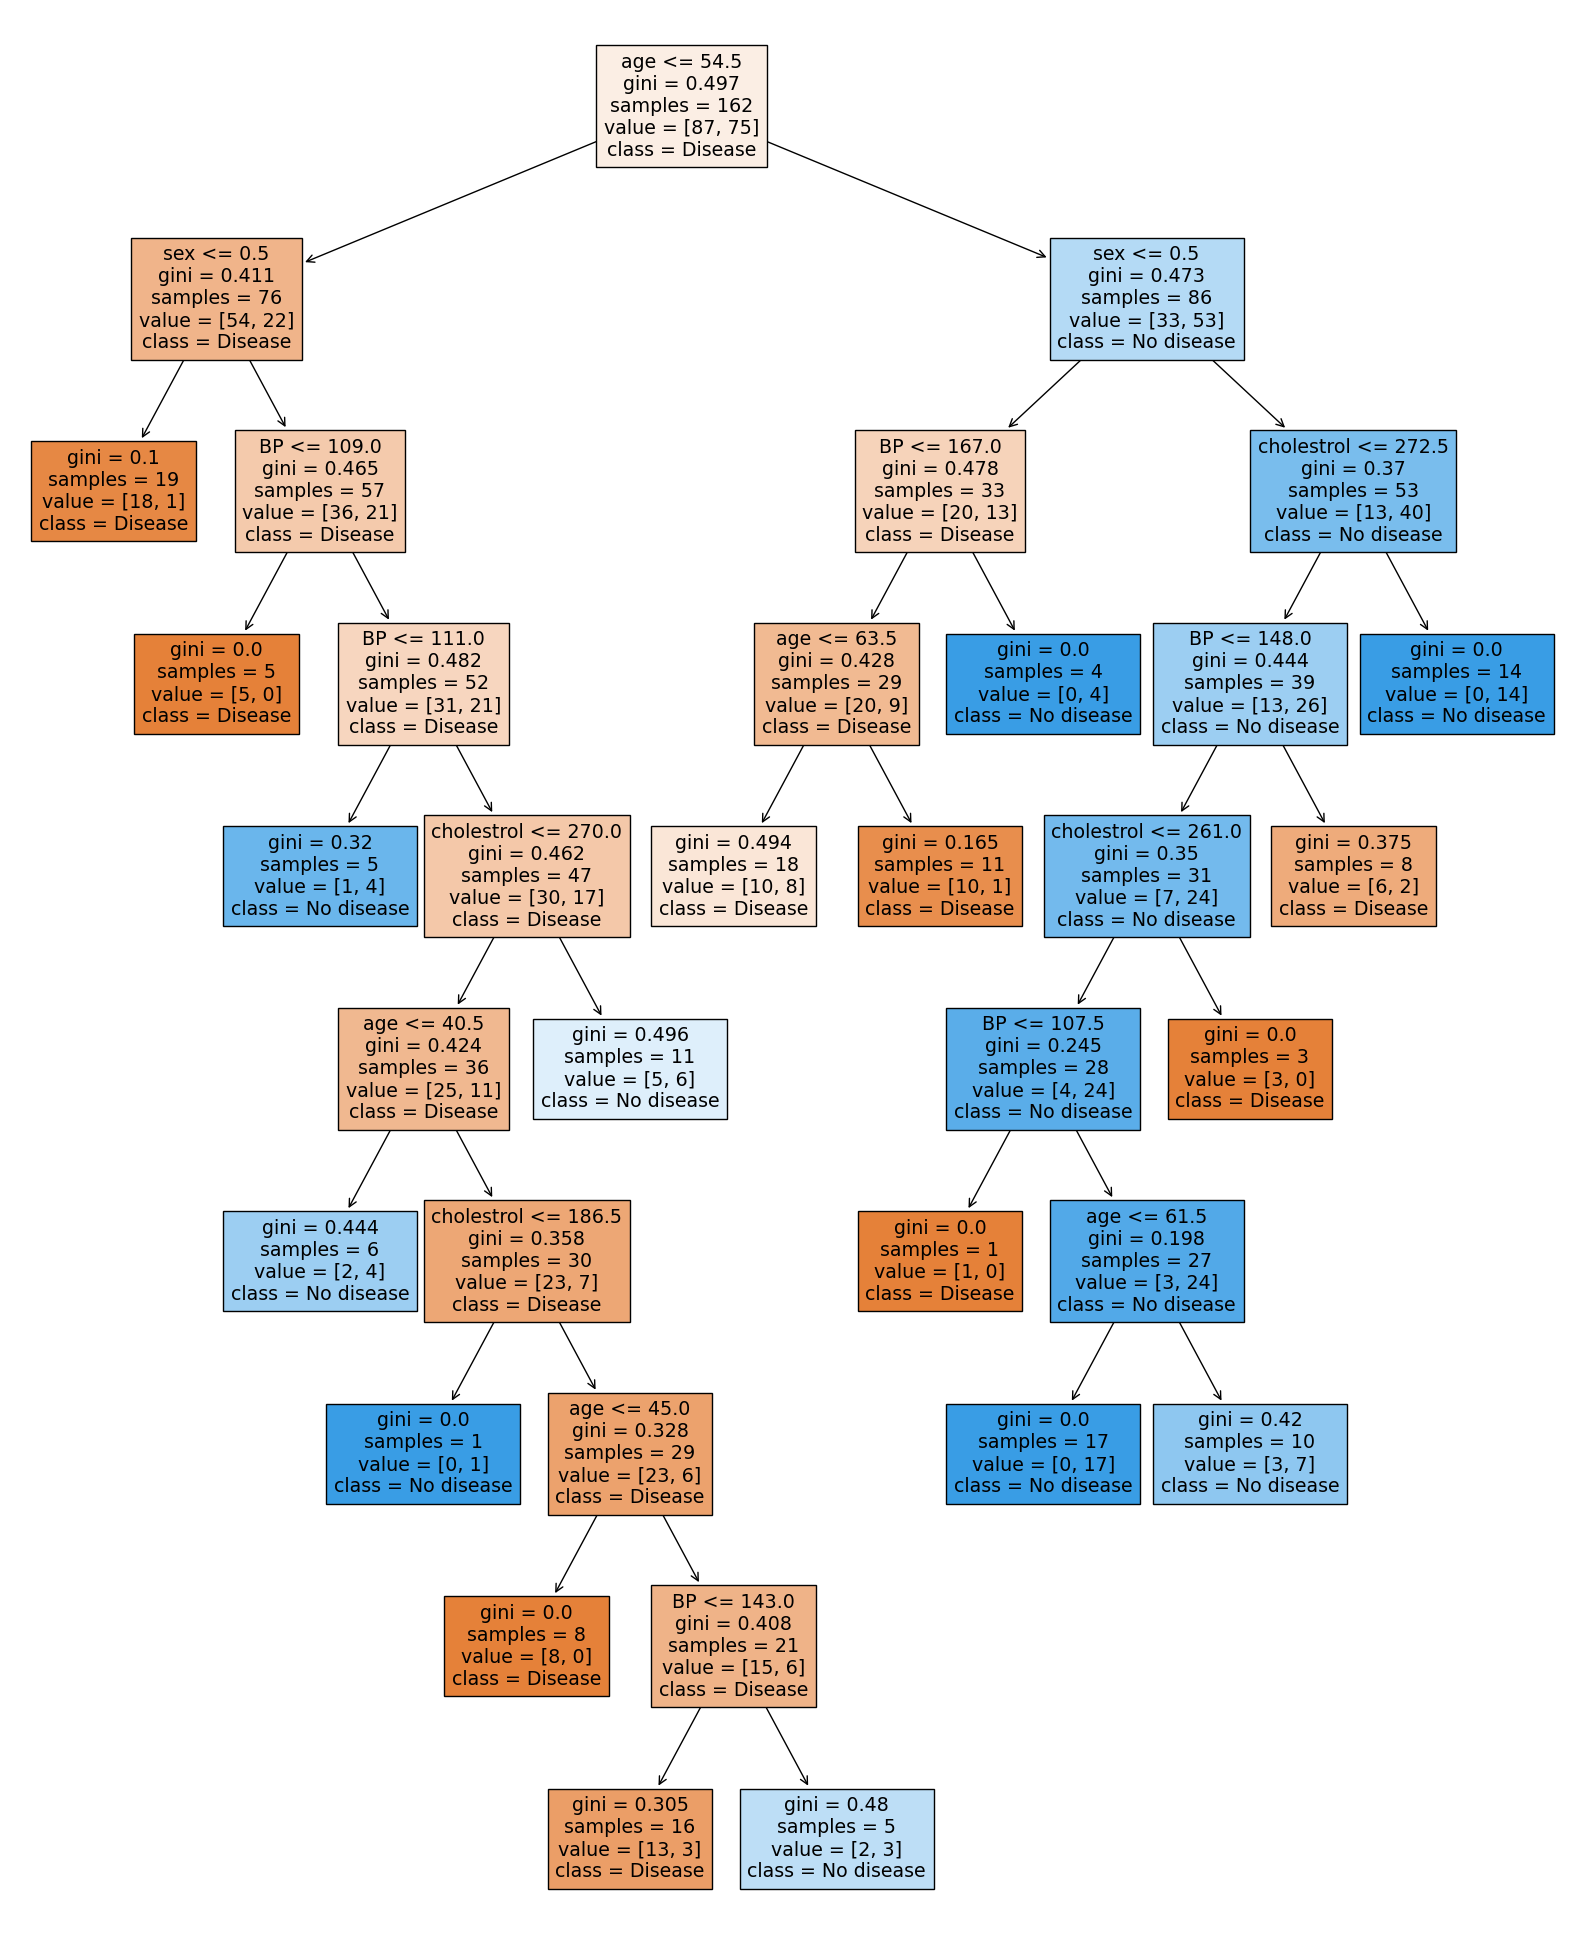

In [30]:
gph = get_df_graph(dt_min_split)

In [31]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8271604938271605
Train Confusion Matrix:
[[74 13]
 [15 60]]
--------------------------------------------------
Test Accuracy : 0.6388888888888888
Test Confusion Matrix:
[[41 22]
 [17 28]]


In [32]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf = 20, random_state = 42)
dt_min_leaf.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

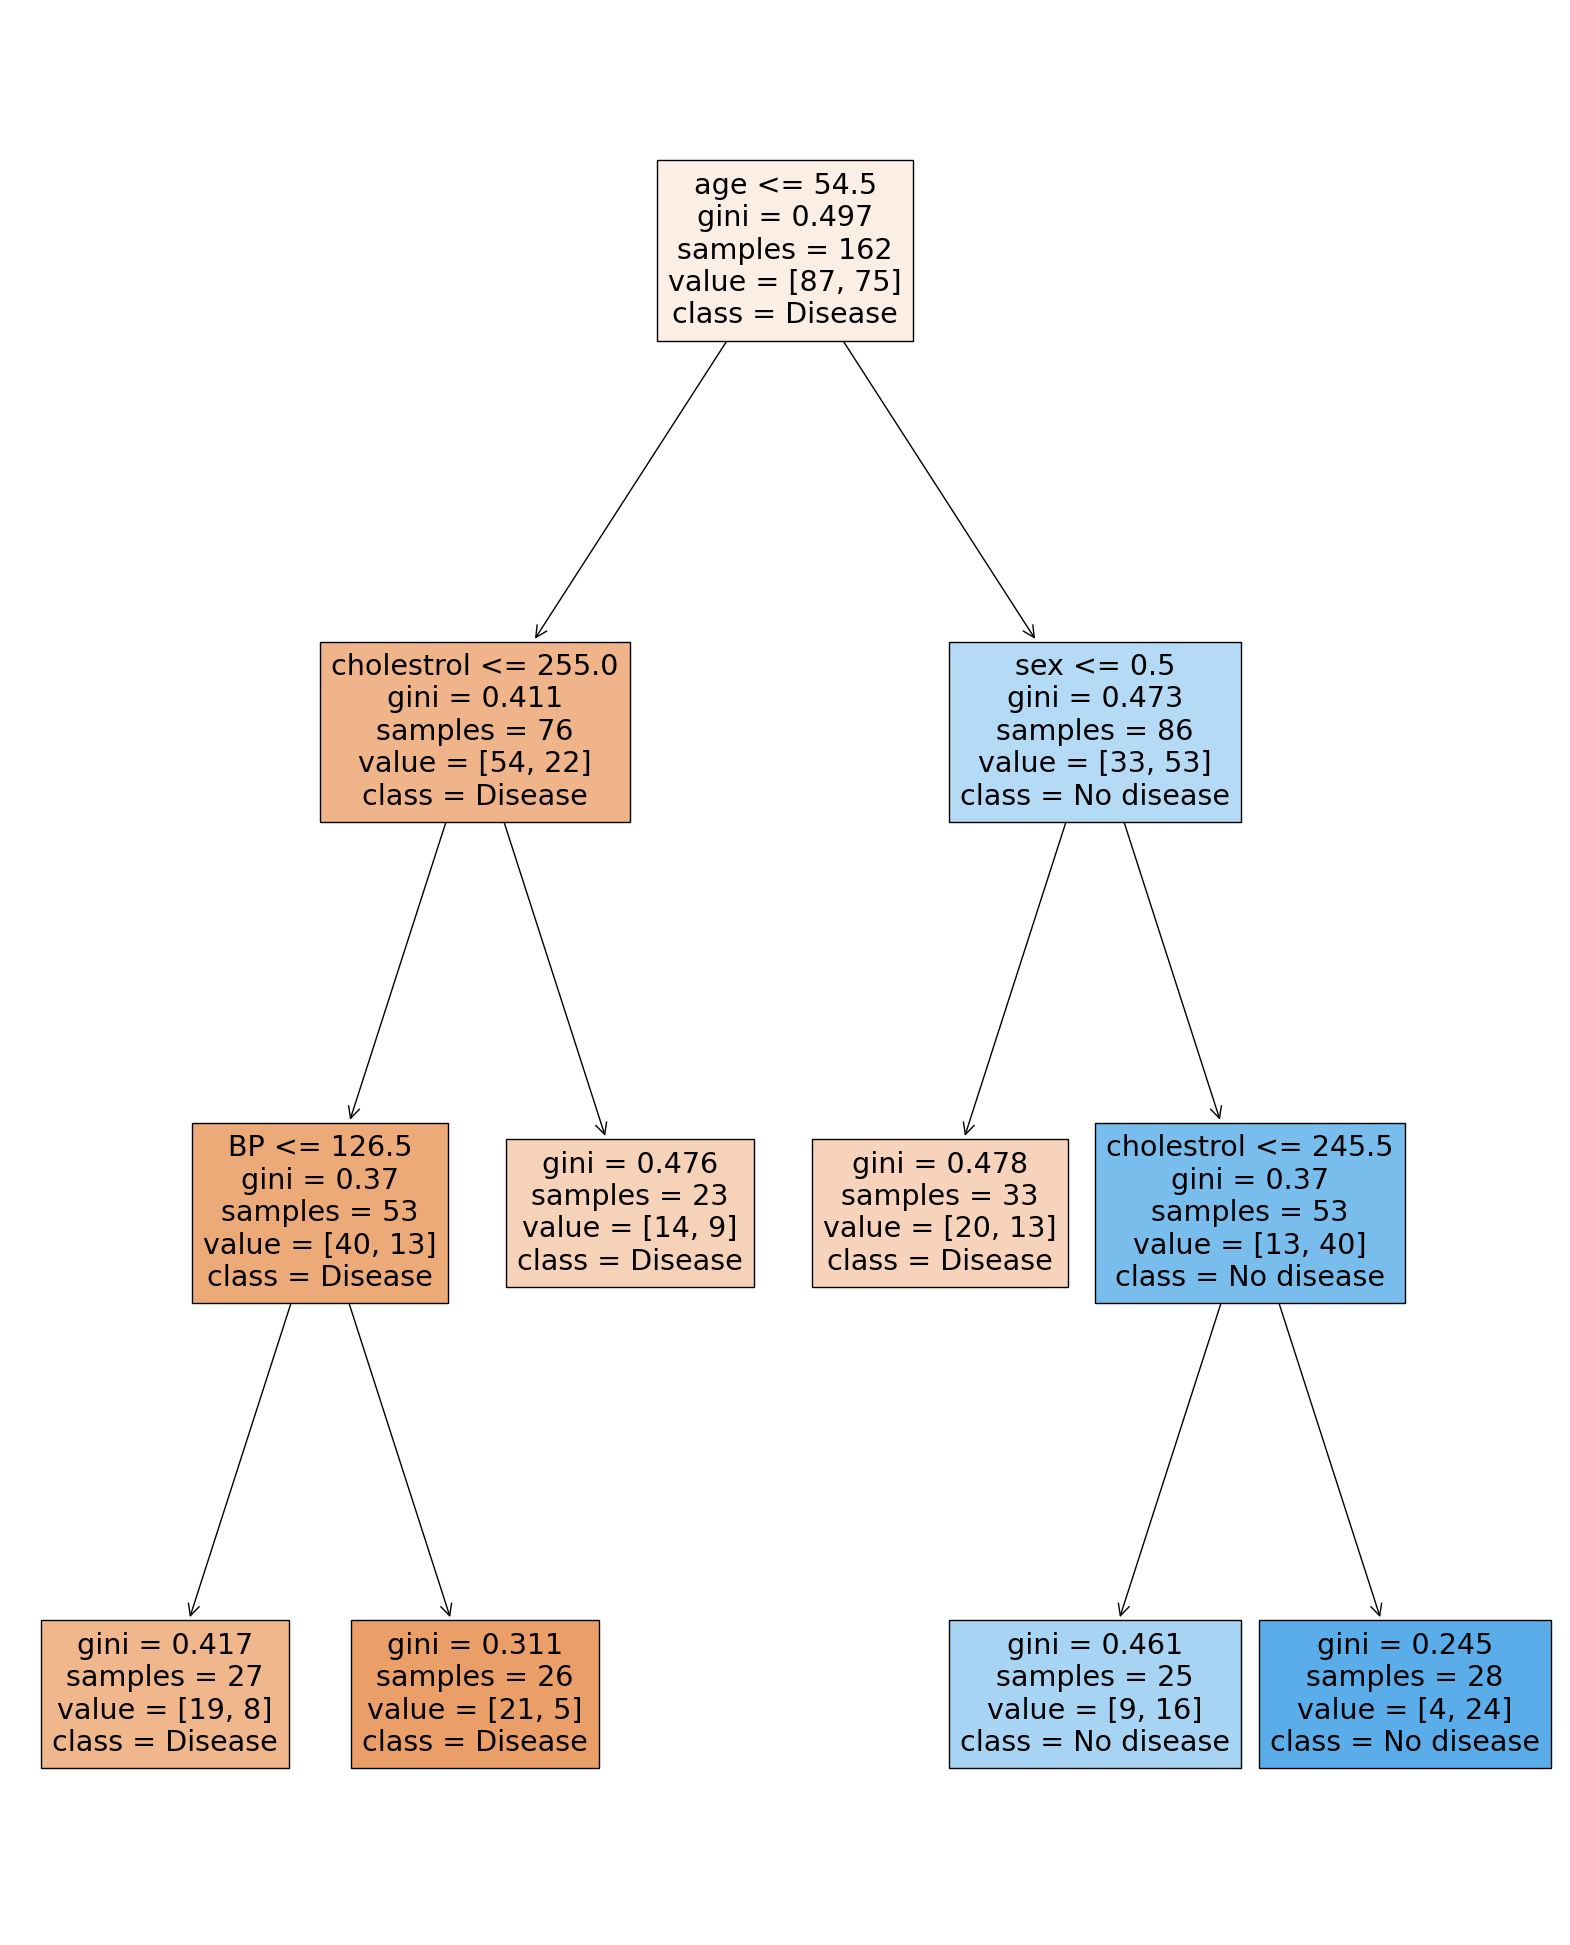

In [33]:
gph = get_df_graph(dt_min_leaf)

In [34]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[74 13]
 [35 40]]
--------------------------------------------------
Test Accuracy : 0.6574074074074074
Test Confusion Matrix:
[[49 14]
 [23 22]]


# Using Entropy instead of Gini

In [35]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf = 20 , random_state = 42 , criterion = "entropy")
dt_min_leaf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

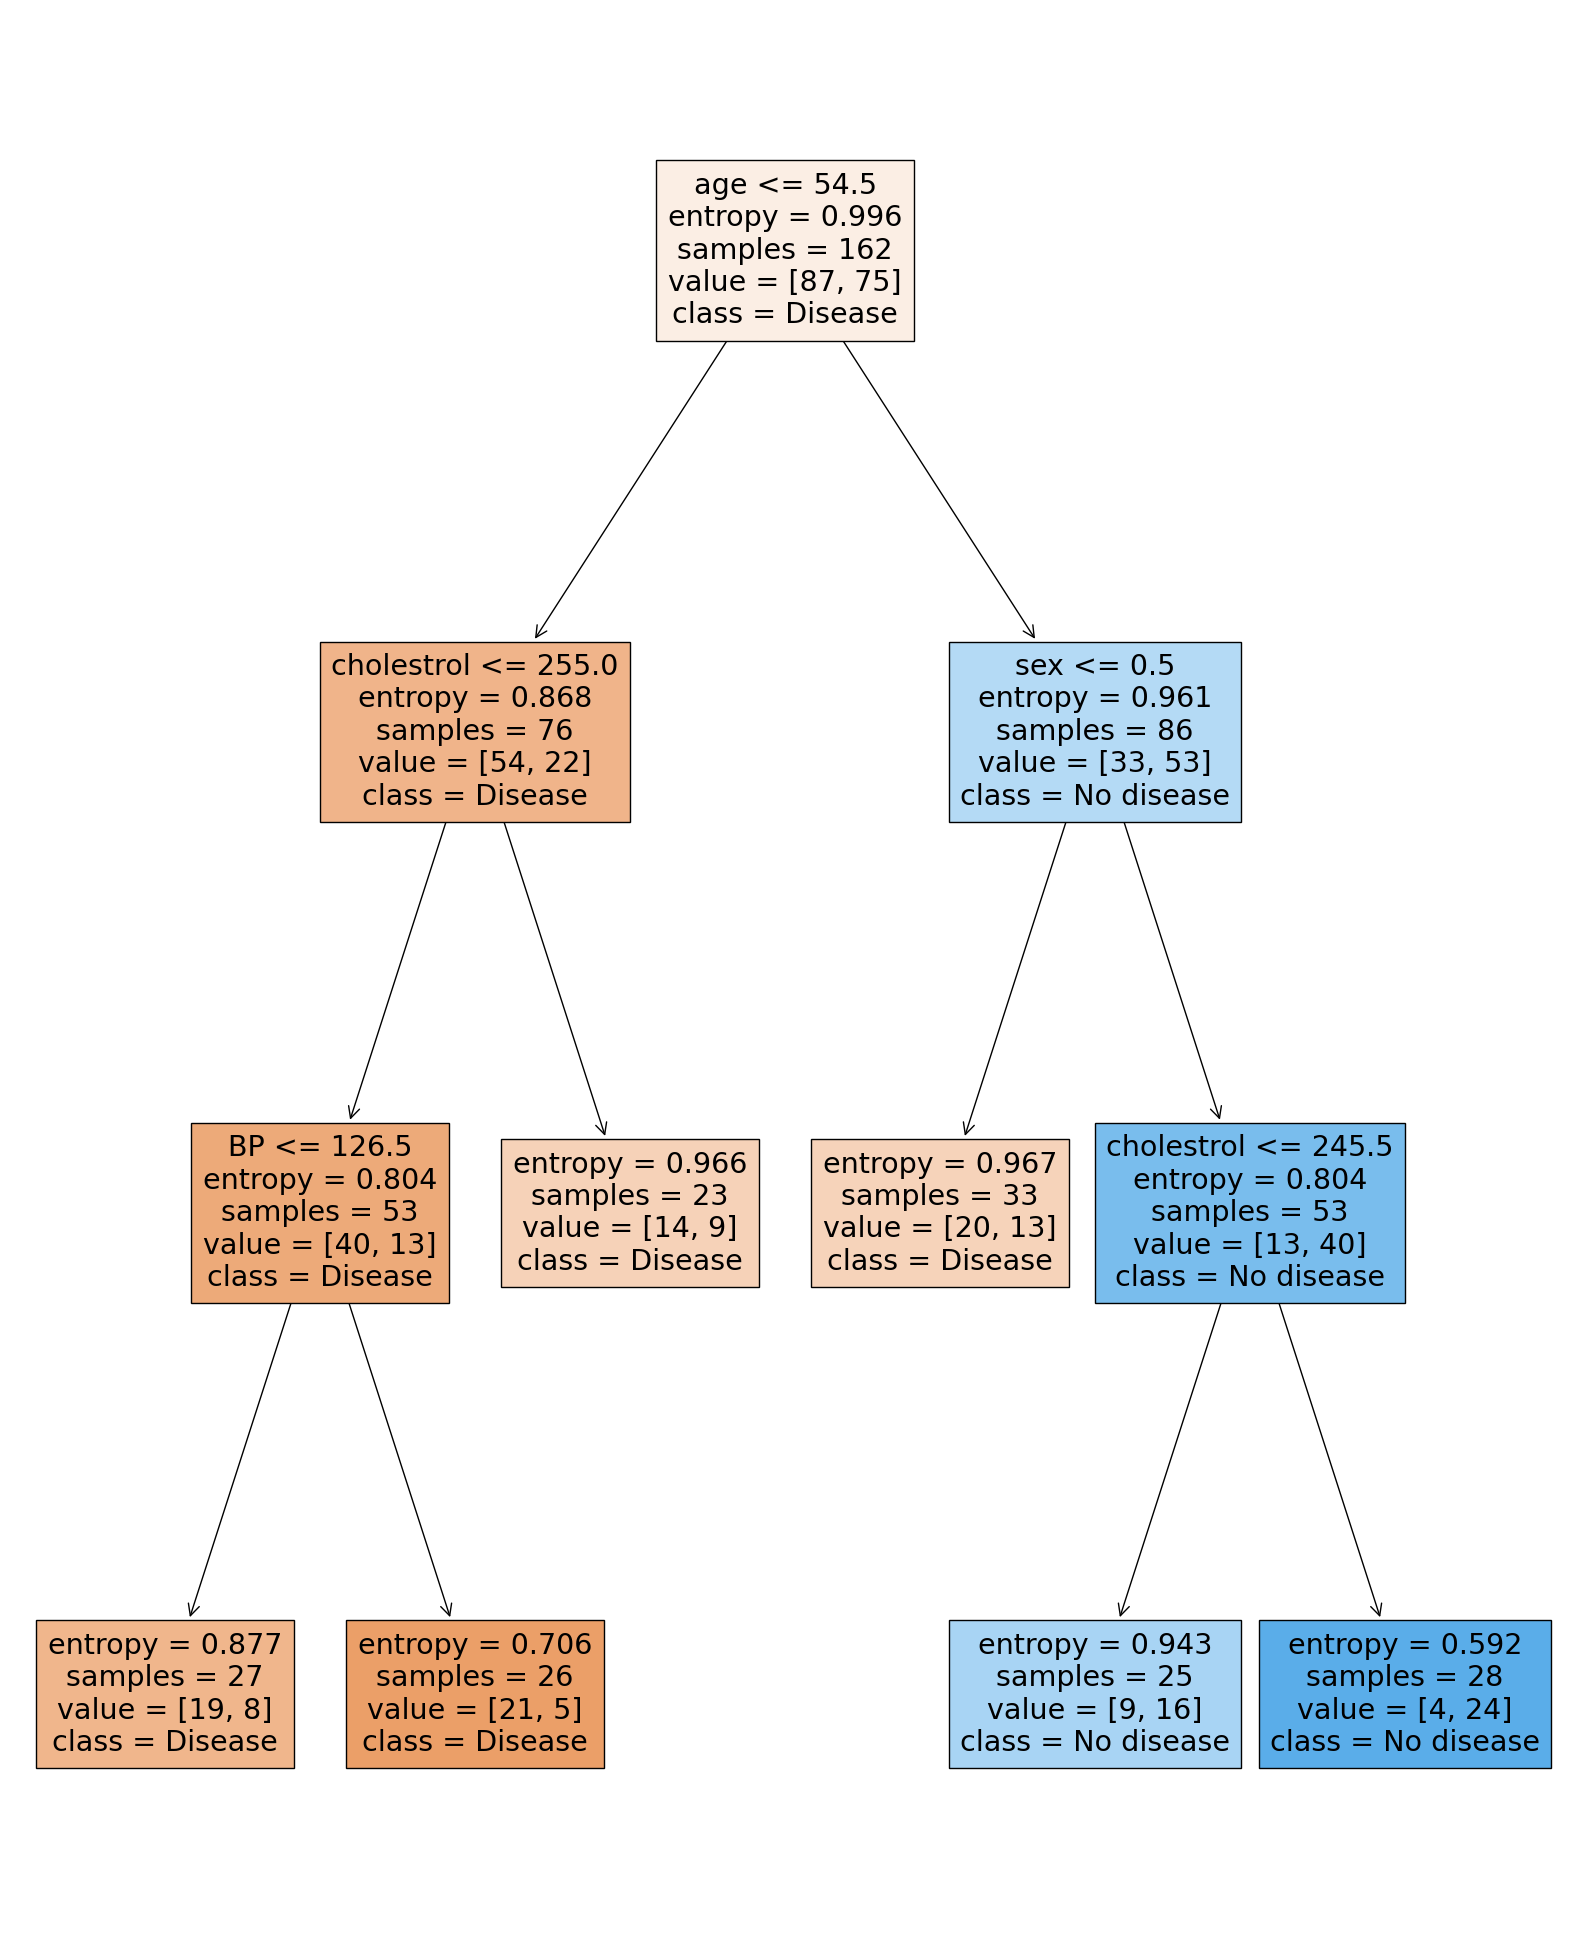

In [36]:
gph = get_df_graph(dt_min_leaf_entropy)

In [37]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[74 13]
 [35 40]]
--------------------------------------------------
Test Accuracy : 0.6574074074074074
Test Confusion Matrix:
[[49 14]
 [23 22]]


# Hyperparameter Tuning

In [38]:
dt = DecisionTreeClassifier(random_state = 42)

In [40]:
from sklearn.model_selection import GridSearchCV

In [42]:
params = {
    "max_depth" : [2,3,5,10,20],
    "min_samples_leaf" : [5,10,20,50,100],
    "criterion" : ["gini","entropy"]
}

In [46]:
grid_search = GridSearchCV(estimator = dt,
                          param_grid = params,
                          cv = 4, n_jobs = -1, verbose = 1, scoring = "accuracy")

In [47]:
%%time
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 281 ms
Wall time: 3.87 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [53]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [55]:
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005642,0.000416,0.004140,1.675330e-03,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.658537,0.658537,0.550,0.725,0.648018,0.062760,11
1,0.007019,0.003090,0.003007,6.529362e-07,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.658537,0.658537,0.550,0.725,0.648018,0.062760,11
2,0.005515,0.001504,0.003259,4.331890e-04,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.658537,0.682927,0.700,0.725,0.691616,0.024262,1
3,0.007520,0.004512,0.005265,3.356113e-03,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.658537,0.609756,0.575,0.700,0.635823,0.047470,19
4,0.004512,0.000501,0.003008,1.044358e-06,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.536585,0.536585,0.525,0.550,0.537043,0.008851,41


In [56]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,0.005515,0.001504,0.003259,4.331890e-04,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.658537,0.682927,0.7,0.725,0.691616,0.024262,1
7,0.005891,0.000651,0.006517,3.070206e-03,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.658537,0.682927,0.7,0.725,0.691616,0.024262,1
12,0.005640,0.001196,0.003259,4.351149e-04,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.658537,0.682927,0.7,0.725,0.691616,0.024262,1
17,0.004261,0.000251,0.002757,2.505188e-04,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.658537,0.682927,0.7,0.725,0.691616,0.024262,1
22,0.003885,0.000217,0.003008,8.760058e-07,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.658537,0.682927,0.7,0.725,0.691616,0.024262,1


In [57]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state=42)

In [59]:
dt_best = grid_search.best_estimator_

In [60]:
evaluate_model(dt_best)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[74 13]
 [35 40]]
--------------------------------------------------
Test Accuracy : 0.6574074074074074
Test Confusion Matrix:
[[49 14]
 [23 22]]


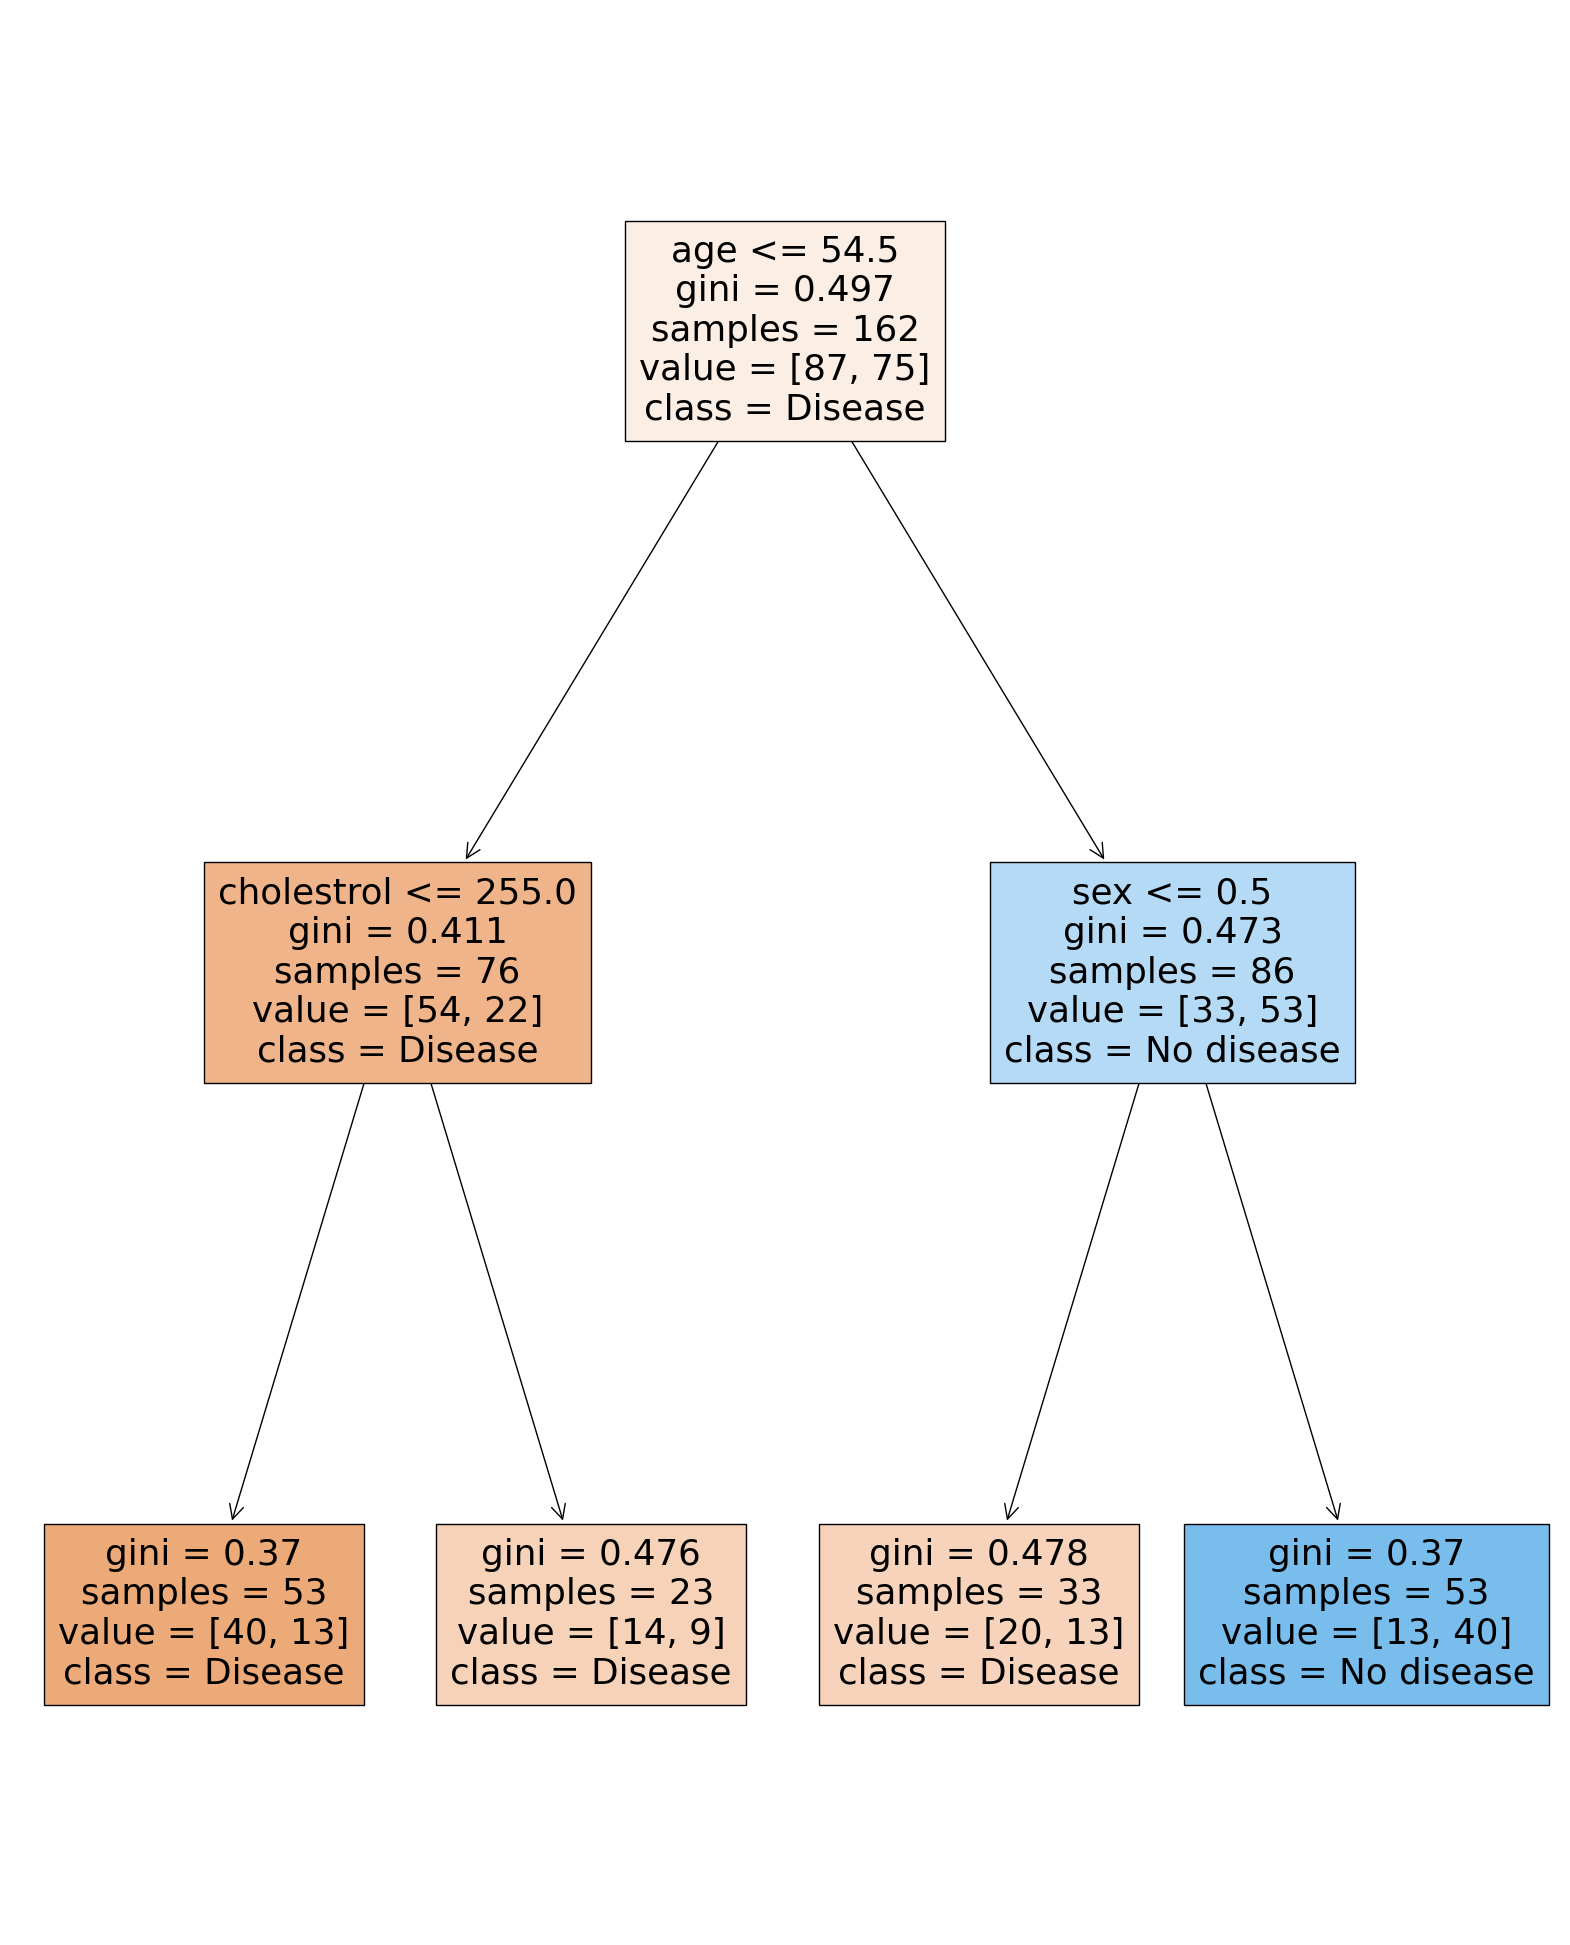

In [62]:
get_df_graph(dt_best)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,dt_best.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        63
           1       0.61      0.49      0.54        45

    accuracy                           0.66       108
   macro avg       0.65      0.63      0.63       108
weighted avg       0.65      0.66      0.65       108

